# transformers

In [60]:
# transformers

In [3]:
!pip install transformers

In [4]:
from transformers import pipeline
import pandas as pd

In [5]:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(task: str = None, model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None, feature_extractor: Union[str, ForwardRef('SequenceFeatureExtractor'), NoneType] = None, image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None, processor: Union[str, transformers.processing_utils.ProcessorMixin, NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, token: Union[str, bool, NoneType] = None, device: Union[int, str, ForwardRef('torch.device'), NoneType] = None, device_map=None, torch_dtype=None, trust_remote_code: Optional[bool] = None, model_kwargs: Dict[str, Any] = None, pi

# **Text-Classifier**

In [6]:
classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
text = 'It was possible fro him easily. So he did it.'

result = classifier(text)

df = pd.DataFrame(result)

df

,label,score
0,POSITIVE,0.813156


In [8]:
result

[{'label': 'POSITIVE', 'score': 0.8131560683250427}]

In [9]:
text = 'It was so impressive .'

result = classifier(text)

df = pd.DataFrame(result)

df

,label,score
0,POSITIVE,0.999878


# **Named Enitity Recognition**

In [10]:
ner = pipeline("token-classification")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [11]:
text = '''Mark Zukerberg will meet Aditya Joshi in New York,USA on Monday 21, 2024 4PM for $3 Trillion deal'''

In [12]:
result = ner(text)

df = pd.DataFrame(result)

df

,entity,score,index,word,start,end
0,I-PER,0.999699,1,Mark,0,4
1,I-PER,0.999238,2,Z,5,6
2,I-PER,0.984425,3,##uke,6,9
3,I-PER,0.769215,4,##rber,9,13
4,I-PER,0.991687,5,##g,13,14
5,I-PER,0.999656,8,Ad,25,27
6,I-PER,0.998242,9,##ity,27,30
7,I-PER,0.999028,10,##a,30,31
8,I-PER,0.999190,11,Josh,32,36
9,I-PER,0.996413,12,##i,36,37


# **Question Answering**

In [13]:
qa = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [14]:
text = '''The India men's national cricket team, colloquially Team India, represents India in men's international cricket. It is governed by the Board of Control for Cricket in India (BCCI), and is a Full Member of the International Cricket Council (ICC) with Test, One Day International (ODI) and Twenty20 International (T20I) status. India are the current Asian Champions and Twenty20 World Champions.[13]

The team has played 586 Test matches, winning 181, losing 182, with 222 draws and 1 tie. As of November 2024, India is ranked second in the ICC Test Championship on 111 rating points. India have played in each World Test Championship final, finishing runners-up in both (2021 and 2023).

Test rivalries include the Border-Gavaskar Trophy (with Australia), Freedom Trophy (with South Africa), Anthony de Mello Trophy and Pataudi Trophy (both with England).

The team has played 1,058 ODI matches, winning 559, losing 445, tying 10 and with 44 ending in a no-result. As of November 2024, India is ranked first in the ICC ODI Championship on 118 rating points. India have appeared in the World Cup final four times 1983, 2003, 2011, 2023 and won twice in 1983 and 2011. It was the second team (after the West Indies) to win the World Cup, and the first to win the competition on home soil after winning it in 2011. India have also won two ICC Champions trophies (2002 and 2013). In addition, they have also won the ODI Asia Cup 7 times in 1984, 1988, 1990–91, 1995, 2010, 2018, 2023.'''

In [15]:
question = ' Border Gavaskar Trophy is played between which two countries?'
result  = qa(question = question, context = text)

df = pd.DataFrame( [result] )

df

,score,start,end,answer
0,0.987334,743,752,Australia


### summarization_ pipeline"

In [16]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [19]:
text = '''Himachal Pradesh is a state in the northern part of India. Situated in the Western Himalayas, it is one of the thirteen mountain states and is characterised by an extreme landscape featuring several peaks and extensive river systems. Himachal Pradesh is the northernmost state of India and shares borders with the union territories of Jammu and Kashmir and Ladakh to the north, and the states of Punjab to the west, Haryana to the southwest, Uttarakhand to the southeast and a very narrow border with Uttar Pradesh to the south. The state also shares an international border to the east with the Tibet Autonomous Region in China. Himachal Pradesh is also known as Dev Bhoomi, meaning 'Land of Gods'[10] and Veer Bhoomi which means 'Land of the Brave'.[11]
The predominantly mountainous region comprising the present-day Himachal Pradesh has been inhabited since pre-historic times, having witnessed multiple waves of human migrations from other areas.[12] Through its history, the region was mostly ruled by local kingdoms, some of which accepted the suzerainty of larger empires. Prior to India's independence from the British, Himachal comprised the hilly regions of the Punjab Province of British India. After independence, many of the hilly territories were organised as the Chief Commissioner's province of Himachal Pradesh, which later became a Union Territory. In 1966, hilly areas of the neighbouring Punjab state were merged into Himachal and it was ultimately granted full statehood in 1971.
Himachal Pradesh is spread across valleys with many perennial rivers flowing through them. Agriculture, horticulture, hydropower, and tourism are important constituents of the state's economy. The hilly state is almost universally electrified, with 99.5% of households having electricity as of 2016. The state was declared India's second open-defecation-free state in 2016.[13] According to a survey of CMS-India Corruption Study in 2017, Himachal Pradesh is India's least corrupt state.[14][15]
Himachal Pradesh is divided into 12 districts.
Etymology
The name of the state is a reference to its setting: Himachal means "snowy slopes" (Sanskrit: hima, meaning "snow"; acala/achala meaning "slopes", or "land", or "abode"). Himachal Pradesh (ɦɪˈmaːtʃəl pɾəˈdeːʃ; literally "snow-laden province"). Himachal refers to being in the "aanchal" of the Himalayas hence, sheltered by the Himalayas or by the snow. It means "the land in the lap of snowy Himalayas". Pradesh means "state". Himachal was referenced by Diwakar Datt Sharma, a Sanskrit scholar, after independence, when "Jan Gan Man" was revealed publicly by Pt. Nehru from Gurudev Tagore's diary. The word was added in the national anthem of India "Jan Gan Man" by Gurudev Rabindranath Tagore when he was writing and composing it. Later after independence of India, Punjab province was divided and the name was given officially to the mountain state as Himachal Pradesh.[16][17]
'''

In [24]:
summary = summarizer(text, min_length = 100, max_length = 120, do_sample = False)

In [25]:
summary[0]['summary_text']

' Himachal Pradesh is a state in the northern part of India . Situated in the Western Himalayas, it is one of the thirteen mountain states and is characterised by an extreme landscape featuring several peaks and extensive river systems . The predominantly mountainous region has been inhabited since pre-historic times, having witnessed multiple waves of human migrations from other areas . The state is almost universally electrified, with 99.5% of households having electricity as of 2016 . The word was added in the national anthem of India "Jan Gan Man" by Gurudev Rabindranath Tag'


- do_sample = False: Reliable and consistent results; same input produces the same summary.
- do_sample = True: Allows for variability and creativity; results may change with each run.
do_sample = False (default behavior):

- - The model uses greedy decoding or beam search, depending on the configuration.
Greedy decoding: The model selects the token with the highest probability at each step without any randomness.
Beam search: It explores multiple sequences simultaneously to find the most likely output sequence.
This results in deterministic output: the same input text will always produce the same summary.
do_sample = True:

- - The model uses sampling-based decoding, introducing randomness to the output.
Instead of always selecting the most probable token, the model samples tokens from the probability distribution generated at each step.
This can lead to more diverse and creative summaries, especially when combined with parameters like top_k (limit to top-k tokens) or top_p (nucleus sampling).

In [26]:
summary = summarizer(text, min_length = 100, max_length = 120, do_sample = True)
summary[0]['summary_text']

' Himachal Pradesh is a state in the northern part of India . Situated in the Western Himalayas, it is characterised by an extreme landscape featuring several peaks and extensive river systems . The predominantly mountainous region has been inhabited since pre-historic times, having witnessed multiple waves of human migrations from other areas . The state was declared India\'s second open-defecation-free state in 2016 . The word was added in the national anthem of India "Jan Gan Man" by Gurudev Rabindranath Tagore .'

### Translation

In [27]:
trans = pipeline('translation_en_to_fr')

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [28]:
text = trans('hello friends, how are you?')
text

[{'translation_text': 'Bonjour amis, comment êtes-vous?'}]

In [30]:
trans = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi")  # Specify the model for English to Hindi translation
text = trans("hello friends, how are you?")
print(text)

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'translation_text': 'हैलो दोस्त, तुम कैसे हो?'}]


### Text Generation

In [31]:
generator = pipeline('text-generation')

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [37]:
data = generator('I want to learn a programming language so',
                 max_length = 30, num_return_sequences = 3)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [38]:
data

[{'generated_text': 'I want to learn a programming language so I can get into more computer science, I want to be passionate about programming, and I want to find ways'},
 {'generated_text': "I want to learn a programming language so I can actually learn code and write it when I'm home. I want to learn the language by looking on"},
 {'generated_text': 'I want to learn a programming language so I need to have the tools to build web apps and my best friends and I need some help with some of'}]

In [39]:
for line in data:
  print(line['generated_text'])

I want to learn a programming language so I can get into more computer science, I want to be passionate about programming, and I want to find ways
I want to learn a programming language so I can actually learn code and write it when I'm home. I want to learn the language by looking on
I want to learn a programming language so I need to have the tools to build web apps and my best friends and I need some help with some of


### Visual Question Answering

In [42]:
from PIL import Image

In [43]:
vqa = pipeline('visual-question-answering')

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [44]:
path = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\images.jpg"

In [47]:
image = Image.open(r"images.jpg")

In [51]:
import matplotlib.pyplot as plt

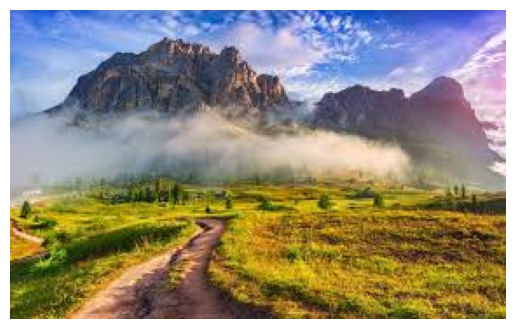

In [52]:
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [48]:
question = 'What is in the image?'
vqa(image, question, top_k = 3)[0]['answer']

'mountains'

top_k = 3: This tells the model to return the top 3 most likely answers.

In [55]:
question = 'What types of mountain are there?'
vqa(image, question, top_k = 3)

[{'score': 0.11200162023305893, 'answer': 'rocky'},
 {'score': 0.02394070290029049, 'answer': 'snow'},
 {'score': 0.014050647616386414, 'answer': 'tall'}]

In [54]:
question = 'What is there aside from mountain"?'
vqa(image, question, top_k = 3)[0]['answer']

'road'

In [57]:
question = 'is the view in image beautiful"?'
vqa(image, question, top_k = 3)

[{'score': 0.9999436140060425, 'answer': 'yes'},
 {'score': 0.027404053136706352, 'answer': 'no'},
 {'score': 0.0002536335086915642, 'answer': 'very'}]

In [58]:
question = 'How is the weather?'
vqa(image, question, top_k = 3)[0]['answer']

'sunny'

In [59]:
question = 'Which season is it in image?'
vqa(image, question, top_k = 3)[0]['answer']

'summer'